# Mall Customer Segmentation
Mall Customer Segmentation is a data analysis project aimed at grouping customers based on similar characteristics and spending behaviors. The main objective of this project is to use clustering techniques to uncover distinct customer segments that exhibit comparable shopping habits and preferences.

This segmentation helps businesses better understand their customers, enabling personalized marketing strategies, improved customer service, and targeted promotions. By grouping customers into meaningful clusters, companies can allocate resources effectively and increase revenue through tailored product offers.

The project focuses on implementing two popular unsupervised clustering algorithms:

- K-Means Clustering, which partitions the customers into K predefined groups based on feature similarity, optimizing within-cluster variance.

- DBSCAN (Density-Based Spatial Clustering of Applications with Noise), which identifies clusters based on data density, effectively handling noise and non-spherical clusters without needing the number of clusters upfront.

## Importing Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

## Basic Observations

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
127,128,Male,40,71,95
167,168,Female,33,86,95
113,114,Male,19,64,46
145,146,Male,28,77,97
188,189,Female,41,103,17
119,120,Female,50,67,57
77,78,Male,40,54,48
2,3,Female,20,16,6
180,181,Female,37,97,32
50,51,Female,49,42,52


The Mall Customer Segmentation dataset contains information about customers of a shopping mall, with the following key features:

- CustomerID: A unique identifier assigned to each customer for reference. This feature is used to distinguish records and is not directly used for clustering.

- Gender: The gender of the customer, typically categorized as Male or Female. This categorical feature can be encoded for analysis to explore differences in shopping behavior.

- Age: The age of the customer in years. Age is a continuous numerical feature and helps in understanding age-related shopping patterns.

- Annual Income (k$): The annual income of the customer in thousands of dollars. This numerical feature indicates the financial capability of the customer and is important for segmenting based on spending power.

- Spending Score (1-100): A score assigned by the mall which reflects customer spending behavior and loyalty. It is often calculated based on purchase history, frequency, and amount spent, with higher scores indicating more valuable customers.

In [4]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


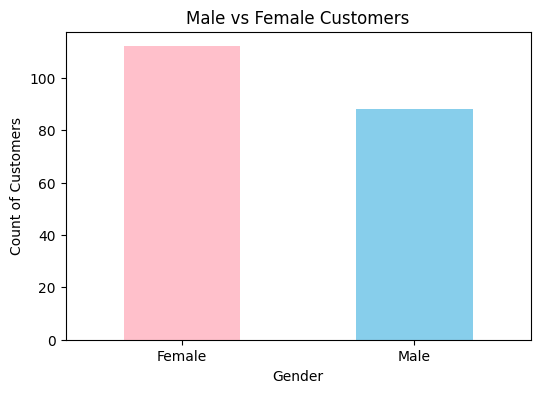

In [13]:
# Count the number of customers by Gender
gender_counts = df['Gender'].value_counts()

# Plot bar graph
plt.figure(figsize=(6,4))
gender_counts.plot(kind='bar', color=['pink','skyblue'])
plt.title('Male vs Female Customers')
plt.xlabel('Gender')
plt.ylabel('Count of Customers')
plt.xticks(rotation=0)
plt.show()

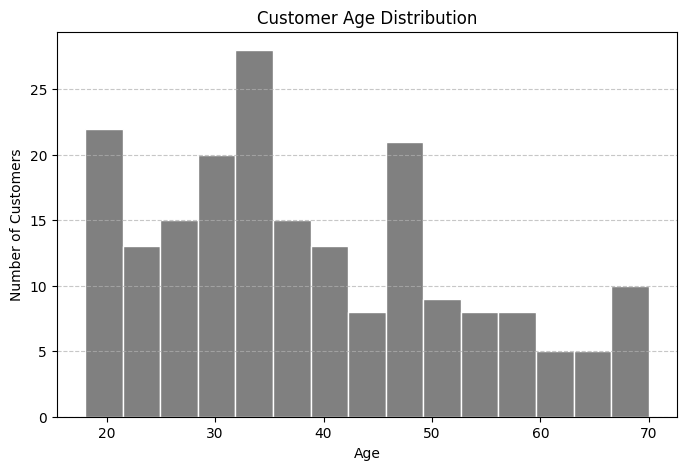

In [29]:
plt.figure(figsize=(8,5))
plt.hist(df['Age'], bins=15, color='grey', edgecolor='white')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

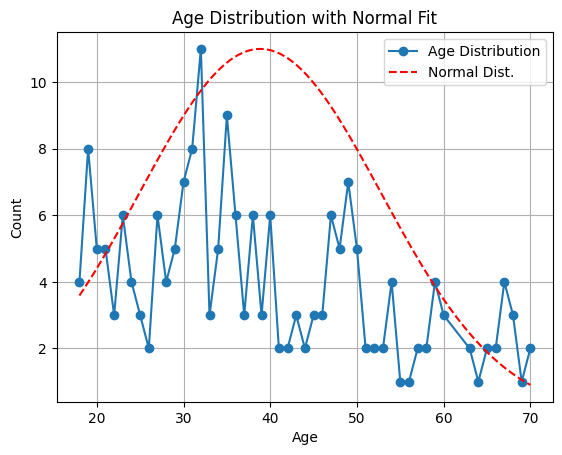

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

age_counts = df['Age'].value_counts().sort_index()
mu, std = norm.fit(df['Age'])
x = np.linspace(age_counts.index.min(), age_counts.index.max(), 100)
pdf_scaled = norm.pdf(x, mu, std) * max(age_counts.values) / max(norm.pdf(x, mu, std))

plt.plot(age_counts.index, age_counts.values, 'o-', label='Age Distribution')
plt.plot(x, pdf_scaled, 'r--', label='Normal Dist.')
plt.title('Age Distribution with Normal Fit')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()